In [1]:
import matplotlib.pyplot as plt
import torch
import os

In [2]:
from easy_diffusion.latent_encoder.trainer import AutoEncoderTrainer
from easy_diffusion.latent_encoder.autoencoder import AutoEncoderKL

In [3]:
from easy_diffusion.aiposdataset import AiposFoodDataset

/home/sysadmin/tangdong/workspace/anaconda3/envs/cn_image_generation/lib/python3.6/site-packages/aliyunsdkcore/auth/algorithm/sha_hmac256.py:20: CryptographyDeprecationWarning: Python 3.6 is no longer supported by the Python core team. Therefore, support for it is deprecated in cryptography. The next release of cryptography (40.0) will be the last to support Python 3.6.
  from cryptography.hazmat.backends import default_backend


In [4]:
import time
from pathlib import Path
start = time.time()
path = "/home/sysadmin/tangdong/workspace/auto_train_img_and_log/img"
train_dataset = AiposFoodDataset(path, split="train", random_crop=True)
val_dataset = AiposFoodDataset(path, split="valid", random_crop=False)
# aiposdataset = MNIST('/home/sysadmin/tangdong/workspace/pytorch_lightning', train=True, transform=transforms.Compose([transforms.Resize(image_shape[-2:]),transforms.ToTensor()]), download=True)

print("spent time is ",time.time()-start)

100%|██████████| 25838/25838 [00:00<00:00, 113443.46it/s]


Download completed, total: 25838, skipped: 25838


2023-04-30 10:48:51.320 | WARNING  | food_detection.data_store.aipos.aipos_data_store_v2:build_dataset_v3:87 - Failed to decode record {'sampleType': 2, 'sourceType': 20, 'storagePath': '286760/76817348/predict/20211229/20211229-1223-4808-d306-1bc399f57957.jpg', 'content': {'data': {}}}, error: 'products'
2023-04-30 10:48:51.333 | WARNING  | food_detection.data_store.aipos.aipos_data_store_v2:build_dataset_v3:87 - Failed to decode record {'sampleType': 2, 'sourceType': 20, 'storagePath': '286760/76765412/predict/20211230/20211230-1903-4183-8f44-eadff4e62c43.jpg', 'content': {'data': {}}}, error: 'products'
2023-04-30 10:48:51.338 | WARNING  | food_detection.data_store.aipos.aipos_data_store_v2:build_dataset_v3:87 - Failed to decode record {'sampleType': 2, 'sourceType': 20, 'storagePath': '286760/76817348/predict/20211231/20211231-1342-5218-803f-f84d02f636cf.jpg', 'content': {'data': {}}}, error: 'products'
2023-04-30 10:48:51.405 | WARNING  | food_detection.data_store.aipos.aipos_data

Download completed, total: 12110, skipped: 12110


2023-04-30 10:48:56.674 | WARNING  | food_detection.data_store.aipos.aipos_data_store_v2:build_dataset_v3:87 - Failed to decode record {'sampleType': 2, 'sourceType': 20, 'storagePath': '265314/76725886/predict/20220304/20220304-1218-2261-a844-787ff318b8db.jpg', 'content': {'data': {}}}, error: 'products'
2023-04-30 10:48:56.676 | WARNING  | food_detection.data_store.aipos.aipos_data_store_v2:build_dataset_v3:87 - Failed to decode record {'sampleType': 2, 'sourceType': 20, 'storagePath': '265314/76725886/predict/20220304/20220304-1232-5368-e212-9456bca4bffa.jpg', 'content': {'data': {}}}, error: 'products'
2023-04-30 10:48:57.772 | INFO     | food_detection.dataset.aipos_dataset:__init__:41 - Dropped 0 annotations with empty label.
2023-04-30 10:48:57.773 | INFO     | food_detection.dataset.aipos_dataset:__init__:43 - Loaded 0 annotation data of 0 classes.
2023-04-30 10:48:57.792 | INFO     | food_detection.dataset.aipos_dataset:__init__:41 - Dropped 0 annotations with empty label.
202

27926


100%|██████████| 25838/25838 [00:00<00:00, 112844.80it/s]


Download completed, total: 25838, skipped: 25838


2023-04-30 10:49:12.081 | WARNING  | food_detection.data_store.aipos.aipos_data_store_v2:build_dataset_v3:87 - Failed to decode record {'sampleType': 2, 'sourceType': 20, 'storagePath': '286760/76817348/predict/20211229/20211229-1223-4808-d306-1bc399f57957.jpg', 'content': {'data': {}}}, error: 'products'
2023-04-30 10:49:12.092 | WARNING  | food_detection.data_store.aipos.aipos_data_store_v2:build_dataset_v3:87 - Failed to decode record {'sampleType': 2, 'sourceType': 20, 'storagePath': '286760/76765412/predict/20211230/20211230-1903-4183-8f44-eadff4e62c43.jpg', 'content': {'data': {}}}, error: 'products'
2023-04-30 10:49:12.098 | WARNING  | food_detection.data_store.aipos.aipos_data_store_v2:build_dataset_v3:87 - Failed to decode record {'sampleType': 2, 'sourceType': 20, 'storagePath': '286760/76817348/predict/20211231/20211231-1342-5218-803f-f84d02f636cf.jpg', 'content': {'data': {}}}, error: 'products'
2023-04-30 10:49:12.160 | WARNING  | food_detection.data_store.aipos.aipos_data

Download completed, total: 12110, skipped: 12110


2023-04-30 10:49:17.290 | WARNING  | food_detection.data_store.aipos.aipos_data_store_v2:build_dataset_v3:87 - Failed to decode record {'sampleType': 2, 'sourceType': 20, 'storagePath': '265314/76725886/predict/20220304/20220304-1218-2261-a844-787ff318b8db.jpg', 'content': {'data': {}}}, error: 'products'
2023-04-30 10:49:17.292 | WARNING  | food_detection.data_store.aipos.aipos_data_store_v2:build_dataset_v3:87 - Failed to decode record {'sampleType': 2, 'sourceType': 20, 'storagePath': '265314/76725886/predict/20220304/20220304-1232-5368-e212-9456bca4bffa.jpg', 'content': {'data': {}}}, error: 'products'
2023-04-30 10:49:18.464 | INFO     | food_detection.dataset.aipos_dataset:__init__:41 - Dropped 0 annotations with empty label.
2023-04-30 10:49:18.465 | INFO     | food_detection.dataset.aipos_dataset:__init__:43 - Loaded 0 annotation data of 0 classes.
2023-04-30 10:49:18.484 | INFO     | food_detection.dataset.aipos_dataset:__init__:41 - Dropped 0 annotations with empty label.
202

27926
spent time is  41.68432641029358


In [5]:
tmp_img = train_dataset[2]

In [6]:
print(tmp_img.shape)

(3, 512, 512)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


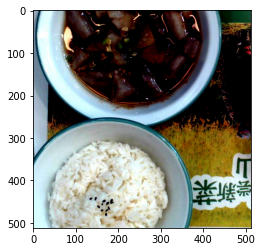

In [7]:
plt.imshow(torch.from_numpy(tmp_img).permute(1,2,0))

In [8]:
#version 1 encoder_cfg = {"double_z":True,
#                "z_channels":64,
#                "resolution": 512,
#                "in_channels": 3,
#                "out_ch": 3,
#                "ch": 64,
#               "ch_mult": [ 1,1,2,2,4,4],  # num_down = len(ch_mult)-1
#               "num_res_blocks": 2,
#               "attn_resolutions": [32,16],
#               "dropout": 0.0}
# version 2
encoder_cfg = {"double_z":True,
               "z_channels":3,
               "resolution": 512,
               "in_channels": 3,
               "out_ch": 3,
               "ch": 64,
              "ch_mult": [ 1,1,2,2,4],  # num_down = len(ch_mult)-1
              "num_res_blocks": 2,
              "attn_resolutions": [],#[32,16],
              "dropout": 0.0}
embed_dim = encoder_cfg['z_channels']

In [9]:
model = AutoEncoderKL(encoder_cfg,encoder_cfg, embed_dim)

making attention of type 'vanilla' with 256 in_channels
Working with z of shape (1, 3, 32, 32) = 3072 dimensions.
making attention of type 'vanilla' with 256 in_channels


In [10]:
model_name = "ddim_demo/AutoEncoderKL_v2_712"

In [11]:
fine_tune = True

In [12]:
if fine_tune:
    states = torch.load(os.path.join(model_name, "ckpt.pth"))
    model.load_state_dict(states[0])    

In [13]:
trainer = AutoEncoderTrainer(model,learning_rate=1e-3,lr_g_factor=1,disc_start=0)

loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/11163 [00:00<?, ?it/s]

autoencoder  loss: 1083586.875000
autoencoder  loss: 635813.750000
gan  loss: 1.213612
autoencoder  loss: 770599.937500
autoencoder  loss: 685948.062500
autoencoder  loss: 675047.500000
gan  loss: 0.103055
autoencoder  loss: 572900.625000
autoencoder  loss: 505473.687500
autoencoder  loss: 585082.687500
gan  loss: 0.036148
autoencoder  loss: 596746.375000
autoencoder  loss: 598689.500000
autoencoder  loss: 537355.687500
gan  loss: 1.109889
autoencoder  loss: 608707.500000
autoencoder  loss: 526390.937500
autoencoder  loss: 614591.125000
gan  loss: 0.007858
autoencoder  loss: 494593.312500
autoencoder  loss: 486424.156250
autoencoder  loss: 643724.750000
gan  loss: 0.088865
autoencoder  loss: 543175.625000
autoencoder  loss: 527495.875000
autoencoder  loss: 450226.187500
gan  loss: 0.786934
autoencoder  loss: 412526.937500
autoencoder  loss: 473257.875000
autoencoder  loss: 440401.437500
gan  loss: 0.622271
autoencoder  loss: 418057.343750
autoencoder  loss: 446097.593750
autoencoder  l

  0%|          | 0/2791 [00:00<?, ?it/s]

validate AutoEncoder Average Loss: 474026.824875, disc Loss: 0.320639


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


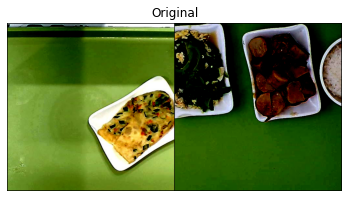

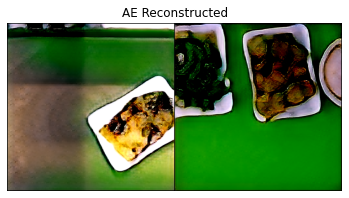

  0%|          | 0/11163 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



autoencoder  loss: 474573.312500
gan  loss: 1.090321
autoencoder  loss: 359769.562500
autoencoder  loss: 362668.718750
autoencoder  loss: 426077.093750
gan  loss: 0.055575


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



autoencoder  loss: 394251.812500
autoencoder  loss: 374550.593750
autoencoder  loss: 330781.687500
gan  loss: 0.205476
autoencoder  loss: 386944.468750
autoencoder  loss: 422852.750000
autoencoder  loss: 372819.218750
gan  loss: 0.422031
autoencoder  loss: 370234.218750
autoencoder  loss: 369830.968750


  0%|          | 0/2791 [00:00<?, ?it/s]

validate AutoEncoder Average Loss: 384299.020863, disc Loss: 0.295085


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


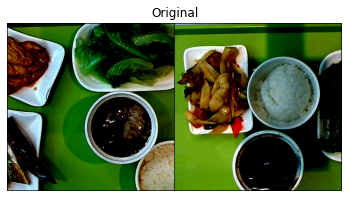

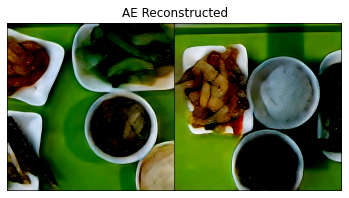

  0%|          | 0/11163 [00:00<?, ?it/s]

autoencoder  loss: 386795.156250
gan  loss: 0.462982
autoencoder  loss: 395427.843750
autoencoder  loss: 442530.562500
autoencoder  loss: 398586.218750
gan  loss: 0.401763
autoencoder  loss: 382944.531250
autoencoder  loss: 391748.625000
autoencoder  loss: 414912.843750
gan  loss: 0.432215
autoencoder  loss: 378441.750000
autoencoder  loss: 378631.218750
autoencoder  loss: 397427.843750
gan  loss: 0.226625
autoencoder  loss: 398459.062500
autoencoder  loss: 380558.062500
autoencoder  loss: 431167.406250
gan  loss: 0.011935
autoencoder  loss: 352800.812500
autoencoder  loss: 385362.937500
autoencoder  loss: 371438.000000
gan  loss: 0.060861
autoencoder  loss: 358542.031250
autoencoder  loss: 384351.968750
autoencoder  loss: 378679.812500
gan  loss: 0.108911
autoencoder  loss: 352505.343750
autoencoder  loss: 346341.937500
autoencoder  loss: 331382.437500
gan  loss: 0.056510
autoencoder  loss: 340961.000000
autoencoder  loss: 350012.875000
autoencoder  loss: 412198.437500
gan  loss: 0.43

  0%|          | 0/2791 [00:00<?, ?it/s]

validate AutoEncoder Average Loss: 399342.414285, disc Loss: 0.376641


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


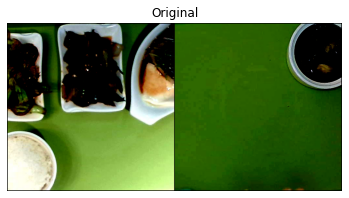

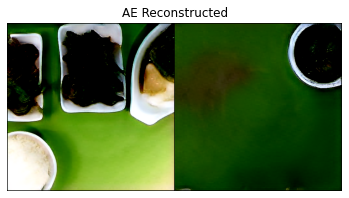

  0%|          | 0/11163 [00:00<?, ?it/s]

autoencoder  loss: 337677.250000
gan  loss: 0.489838
autoencoder  loss: 326443.187500
autoencoder  loss: 378682.500000
autoencoder  loss: 323165.156250
gan  loss: 0.122316
autoencoder  loss: 309520.062500
autoencoder  loss: 395025.062500
autoencoder  loss: 347060.968750
gan  loss: 0.353789
autoencoder  loss: 342180.437500
autoencoder  loss: 333189.375000
autoencoder  loss: 312518.875000
gan  loss: 0.782025
autoencoder  loss: 367563.406250
autoencoder  loss: 379401.781250
autoencoder  loss: 371458.125000
gan  loss: 0.846927
autoencoder  loss: 336716.906250
autoencoder  loss: 370550.718750
autoencoder  loss: 353647.093750
gan  loss: 0.284813
autoencoder  loss: 346366.468750
autoencoder  loss: 415686.937500
gan  loss: 0.587428
autoencoder  loss: 385225.406250
autoencoder  loss: 300695.906250
autoencoder  loss: 345151.187500
gan  loss: 0.844836


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



autoencoder  loss: 351243.937500
autoencoder  loss: 324724.937500
gan  loss: 0.145917
autoencoder  loss: 341475.781250
autoencoder  loss: 359754.593750
autoencoder  loss: 319340.812500


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



autoencoder  loss: 334233.187500
gan  loss: 0.895928
autoencoder  loss: 343715.937500
autoencoder  loss: 397554.843750
autoencoder  loss: 314404.531250
gan  loss: 0.344148


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



validate AutoEncoder Average Loss: 365505.576549, disc Loss: 0.498119


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


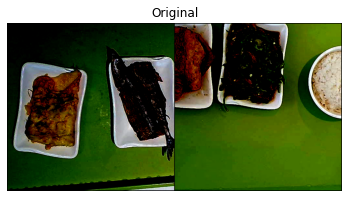

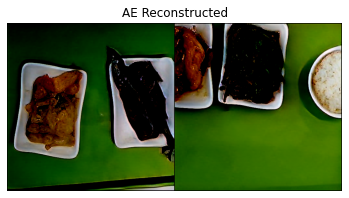

  0%|          | 0/11163 [00:00<?, ?it/s]

autoencoder  loss: 332861.031250
autoencoder  loss: 345161.656250
autoencoder  loss: 331946.531250


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



autoencoder  loss: 298515.093750
gan  loss: 0.363771
autoencoder  loss: 324379.343750
autoencoder  loss: 340561.093750
autoencoder  loss: 348152.750000
gan  loss: 0.352466


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



autoencoder  loss: 375032.843750
autoencoder  loss: 315895.250000
autoencoder  loss: 384238.750000
gan  loss: 0.183548
autoencoder  loss: 349199.781250
autoencoder  loss: 357254.562500


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



validate AutoEncoder Average Loss: 382138.344416, disc Loss: 0.525626


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


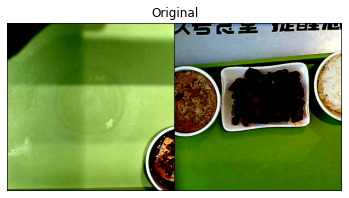

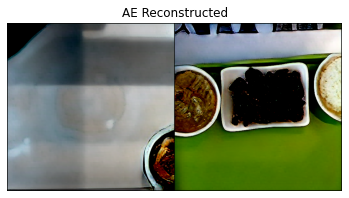

  0%|          | 0/11163 [00:00<?, ?it/s]

autoencoder  loss: 316519.625000
autoencoder  loss: 291336.218750
autoencoder  loss: 354493.000000
gan  loss: 0.595029
autoencoder  loss: 310286.937500
autoencoder  loss: 320689.656250
autoencoder  loss: 296612.531250
gan  loss: 0.560413
autoencoder  loss: 358455.906250
autoencoder  loss: 362174.937500
autoencoder  loss: 351561.625000
gan  loss: 0.597599
autoencoder  loss: 369380.937500
autoencoder  loss: 343386.750000
autoencoder  loss: 341492.906250
gan  loss: 0.809826
autoencoder  loss: 288120.781250
autoencoder  loss: 319868.875000
autoencoder  loss: 283582.750000
gan  loss: 0.373528
autoencoder  loss: 327139.062500
autoencoder  loss: 333297.406250
autoencoder  loss: 306362.625000
gan  loss: 0.531112
autoencoder  loss: 337185.968750
autoencoder  loss: 352079.000000
autoencoder  loss: 259749.468750
gan  loss: 0.777515
autoencoder  loss: 348312.093750
autoencoder  loss: 330746.562500
autoencoder  loss: 408472.343750
gan  loss: 0.223260
autoencoder  loss: 297318.875000
autoencoder  lo

  0%|          | 0/2791 [00:00<?, ?it/s]

validate AutoEncoder Average Loss: 344458.910578, disc Loss: 0.403743


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


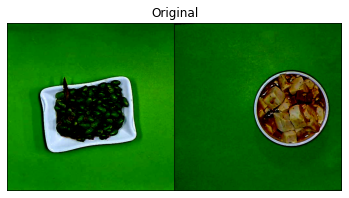

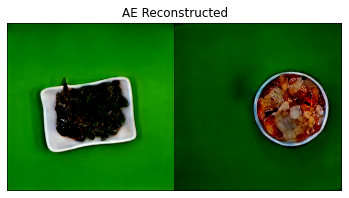

  0%|          | 0/11163 [00:00<?, ?it/s]

autoencoder  loss: 266623.187500
autoencoder  loss: 286922.625000
gan  loss: 0.840176
autoencoder  loss: 328191.968750
autoencoder  loss: 284630.812500
autoencoder  loss: 365593.656250
gan  loss: 0.371743
autoencoder  loss: 290855.312500
autoencoder  loss: 311501.406250
autoencoder  loss: 322115.750000
gan  loss: 0.373396
autoencoder  loss: 300653.875000
autoencoder  loss: 311658.781250
autoencoder  loss: 296927.187500
gan  loss: 0.624589
autoencoder  loss: 307098.218750
autoencoder  loss: 337780.187500
autoencoder  loss: 315576.062500
gan  loss: 0.594820
autoencoder  loss: 336585.250000
autoencoder  loss: 301242.781250
autoencoder  loss: 317047.781250
gan  loss: 0.121884
autoencoder  loss: 274295.656250
autoencoder  loss: 277596.218750
autoencoder  loss: 311590.156250
gan  loss: 0.765812
autoencoder  loss: 287738.875000
autoencoder  loss: 302237.375000
autoencoder  loss: 298512.656250
gan  loss: 0.252015
autoencoder  loss: 331135.687500
autoencoder  loss: 258063.562500
autoencoder  lo

  0%|          | 0/2791 [00:00<?, ?it/s]

validate AutoEncoder Average Loss: 323776.124670, disc Loss: 0.403327


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


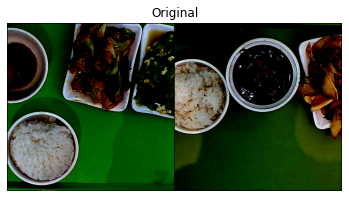

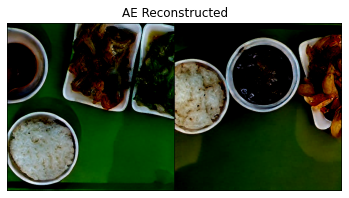

  0%|          | 0/11163 [00:00<?, ?it/s]

autoencoder  loss: 292265.781250
gan  loss: 1.410126
autoencoder  loss: 280012.156250
autoencoder  loss: 283853.687500
autoencoder  loss: 324803.093750
gan  loss: 0.320066
autoencoder  loss: 316116.343750
autoencoder  loss: 371975.875000
autoencoder  loss: 294138.593750
gan  loss: 0.304898
autoencoder  loss: 331224.250000
autoencoder  loss: 273854.593750
autoencoder  loss: 327629.843750
gan  loss: 0.395598
autoencoder  loss: 281031.031250
autoencoder  loss: 321434.375000
autoencoder  loss: 310613.468750
gan  loss: 0.190414
autoencoder  loss: 286874.406250
autoencoder  loss: 285835.406250
autoencoder  loss: 245092.093750
gan  loss: 1.156948
autoencoder  loss: 238788.046875
autoencoder  loss: 253512.453125
autoencoder  loss: 285909.625000
gan  loss: 0.345175
autoencoder  loss: 306601.718750
autoencoder  loss: 317068.656250
autoencoder  loss: 295999.687500
gan  loss: 1.277002
autoencoder  loss: 308149.406250
autoencoder  loss: 280633.312500
autoencoder  loss: 340827.531250
gan  loss: 0.84

  0%|          | 0/2791 [00:00<?, ?it/s]

validate AutoEncoder Average Loss: 325246.816644, disc Loss: 0.702655


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


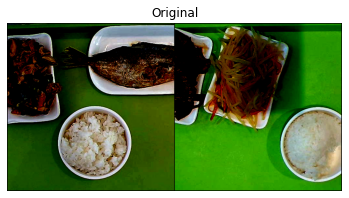

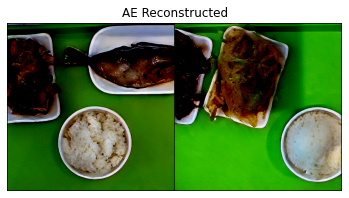

  0%|          | 0/11163 [00:00<?, ?it/s]

autoencoder  loss: 302903.156250
gan  loss: 0.316513
autoencoder  loss: 291257.218750
autoencoder  loss: 302655.531250
autoencoder  loss: 236386.890625
gan  loss: 0.347130
autoencoder  loss: 283709.437500
autoencoder  loss: 316581.750000
autoencoder  loss: 305911.312500
gan  loss: 0.636236
autoencoder  loss: 289565.687500
autoencoder  loss: 282681.750000
autoencoder  loss: 299923.250000
gan  loss: 0.629913
autoencoder  loss: 273152.718750
autoencoder  loss: 334135.562500
autoencoder  loss: 312078.562500
gan  loss: 0.448157
autoencoder  loss: 309262.281250
autoencoder  loss: 275785.250000
autoencoder  loss: 281895.875000
gan  loss: 0.255335
autoencoder  loss: 290957.875000
autoencoder  loss: 258833.093750
autoencoder  loss: 301966.906250
gan  loss: 0.412493
autoencoder  loss: 295618.781250
autoencoder  loss: 307984.000000
autoencoder  loss: 283316.406250
gan  loss: 0.510494
autoencoder  loss: 270838.031250
autoencoder  loss: 292398.093750
autoencoder  loss: 326785.125000
gan  loss: 0.17

  0%|          | 0/2791 [00:00<?, ?it/s]

validate AutoEncoder Average Loss: 304410.619563, disc Loss: 0.608645


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


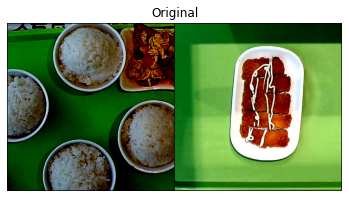

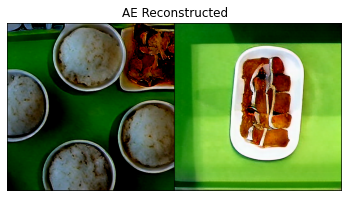

  0%|          | 0/11163 [00:00<?, ?it/s]

gan  loss: 0.096962
autoencoder  loss: 310316.906250
autoencoder  loss: 251034.781250
autoencoder  loss: 296376.656250
gan  loss: 0.603325
autoencoder  loss: 263897.781250
autoencoder  loss: 307956.968750
autoencoder  loss: 286782.375000
gan  loss: 0.266749
autoencoder  loss: 305449.968750
autoencoder  loss: 274982.937500
autoencoder  loss: 337723.281250
gan  loss: 0.457101
autoencoder  loss: 277351.437500
autoencoder  loss: 294131.281250
autoencoder  loss: 307465.031250
gan  loss: 0.635543
autoencoder  loss: 286072.406250
autoencoder  loss: 283250.062500
autoencoder  loss: 278675.593750
gan  loss: 0.165316
autoencoder  loss: 309311.500000
autoencoder  loss: 284606.437500
autoencoder  loss: 295637.625000
gan  loss: 0.439159
autoencoder  loss: 334364.656250
autoencoder  loss: 253322.781250
autoencoder  loss: 303661.625000
gan  loss: 0.301088
autoencoder  loss: 294163.562500
autoencoder  loss: 296497.187500
autoencoder  loss: 317236.906250
gan  loss: 0.336748
autoencoder  loss: 292842.75

  0%|          | 0/2791 [00:00<?, ?it/s]

validate AutoEncoder Average Loss: 303793.513108, disc Loss: 0.410166


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


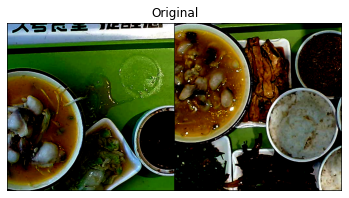

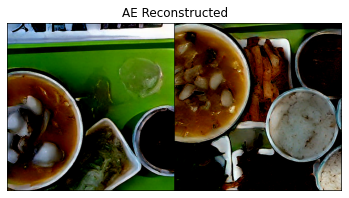

  0%|          | 0/11163 [00:00<?, ?it/s]

autoencoder  loss: 293370.375000
autoencoder  loss: 235075.937500
autoencoder  loss: 286549.687500
gan  loss: 0.616991
autoencoder  loss: 394574.625000
autoencoder  loss: 261897.500000
autoencoder  loss: 252959.718750
gan  loss: 0.186506
autoencoder  loss: 307341.156250
autoencoder  loss: 254973.718750
autoencoder  loss: 268167.468750
gan  loss: 0.300522
autoencoder  loss: 366842.531250
autoencoder  loss: 303980.500000
autoencoder  loss: 308209.843750
gan  loss: 0.478290
autoencoder  loss: 283539.000000
autoencoder  loss: 343143.187500
autoencoder  loss: 282723.437500
gan  loss: 0.589616
autoencoder  loss: 274916.562500
autoencoder  loss: 293696.781250
autoencoder  loss: 254782.578125
gan  loss: 0.802024
autoencoder  loss: 290158.687500
autoencoder  loss: 309208.812500
autoencoder  loss: 330555.437500
gan  loss: 0.332976
autoencoder  loss: 289110.250000
autoencoder  loss: 275216.093750
autoencoder  loss: 348353.250000
gan  loss: 0.804907
autoencoder  loss: 283318.312500
autoencoder  lo

  0%|          | 0/2791 [00:00<?, ?it/s]

validate AutoEncoder Average Loss: 296935.994224, disc Loss: 0.401270


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


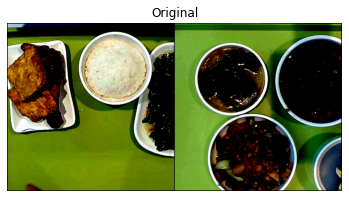

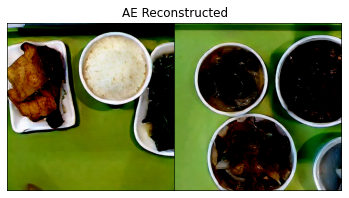

  0%|          | 0/11163 [00:00<?, ?it/s]

autoencoder  loss: 296219.750000
autoencoder  loss: 298821.781250
autoencoder  loss: 276448.843750
gan  loss: 0.608184
autoencoder  loss: 266403.843750
autoencoder  loss: 219433.218750
autoencoder  loss: 298343.375000
gan  loss: 0.136996
autoencoder  loss: 287339.437500
autoencoder  loss: 270886.968750
autoencoder  loss: 293252.437500
gan  loss: 0.201318
autoencoder  loss: 256030.437500
autoencoder  loss: 334839.437500
autoencoder  loss: 328496.718750
gan  loss: 0.072304
autoencoder  loss: 289776.375000
autoencoder  loss: 307393.468750
autoencoder  loss: 408337.281250
gan  loss: 0.536488
autoencoder  loss: 224840.234375
autoencoder  loss: 275567.687500
autoencoder  loss: 292641.312500
gan  loss: 0.583569
autoencoder  loss: 304748.906250
autoencoder  loss: 263353.187500
autoencoder  loss: 318272.062500
gan  loss: 0.310456
autoencoder  loss: 324178.281250
autoencoder  loss: 254921.515625
autoencoder  loss: 294094.281250
gan  loss: 0.751884
autoencoder  loss: 308425.562500
autoencoder  lo

  0%|          | 0/2791 [00:00<?, ?it/s]

validate AutoEncoder Average Loss: 297871.760650, disc Loss: 0.516509


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


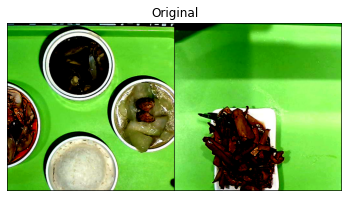

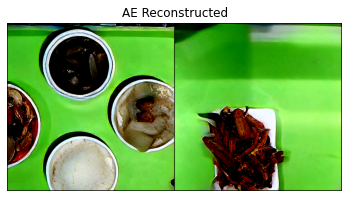

  0%|          | 0/11163 [00:00<?, ?it/s]

autoencoder  loss: 335602.843750
autoencoder  loss: 301668.468750
gan  loss: 0.350186
autoencoder  loss: 277629.500000
autoencoder  loss: 260824.906250
autoencoder  loss: 294098.500000
gan  loss: 0.364566
autoencoder  loss: 251859.515625
autoencoder  loss: 289017.125000
autoencoder  loss: 256889.953125
gan  loss: 0.264068
autoencoder  loss: 349749.781250
autoencoder  loss: 254110.218750
autoencoder  loss: 277489.656250
gan  loss: 0.512947
autoencoder  loss: 286555.500000
autoencoder  loss: 222795.265625
autoencoder  loss: 280318.562500
gan  loss: 0.620052
autoencoder  loss: 386995.218750
autoencoder  loss: 282659.468750
autoencoder  loss: 283556.625000
gan  loss: 0.484790
autoencoder  loss: 288395.687500
autoencoder  loss: 234894.078125
autoencoder  loss: 326487.937500
gan  loss: 0.185656
autoencoder  loss: 291044.656250
autoencoder  loss: 303351.406250
autoencoder  loss: 281600.000000
gan  loss: 0.319121
autoencoder  loss: 268070.281250
autoencoder  loss: 260230.031250
autoencoder  lo

  0%|          | 0/2791 [00:00<?, ?it/s]

validate AutoEncoder Average Loss: 292149.491343, disc Loss: 0.577771


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


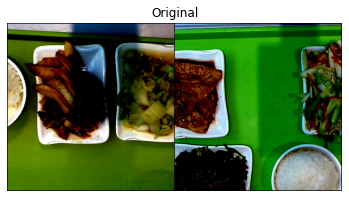

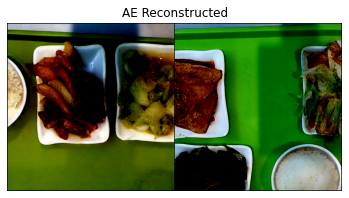

  0%|          | 0/11163 [00:00<?, ?it/s]

autoencoder  loss: 299750.281250
autoencoder  loss: 271595.500000
gan  loss: 0.181803
autoencoder  loss: 280621.187500
autoencoder  loss: 267686.593750
autoencoder  loss: 280313.406250
gan  loss: 0.120981
autoencoder  loss: 276996.687500
autoencoder  loss: 294106.750000
gan  loss: 0.353734
autoencoder  loss: 273370.375000
autoencoder  loss: 261967.062500
autoencoder  loss: 275675.656250
gan  loss: 0.377920
autoencoder  loss: 273254.531250
autoencoder  loss: 310890.593750
autoencoder  loss: 286165.156250
gan  loss: 0.322170
autoencoder  loss: 245283.078125
autoencoder  loss: 289122.625000
autoencoder  loss: 292826.468750
gan  loss: 0.266223
autoencoder  loss: 313055.312500
autoencoder  loss: 283052.062500
autoencoder  loss: 299747.062500
gan  loss: 0.314534
autoencoder  loss: 262544.406250
autoencoder  loss: 262869.718750
autoencoder  loss: 268002.000000
gan  loss: 0.325239
autoencoder  loss: 339255.093750
autoencoder  loss: 261285.359375
autoencoder  loss: 301840.843750
gan  loss: 0.35

  0%|          | 0/2791 [00:00<?, ?it/s]

validate AutoEncoder Average Loss: 297662.322554, disc Loss: 0.644235


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


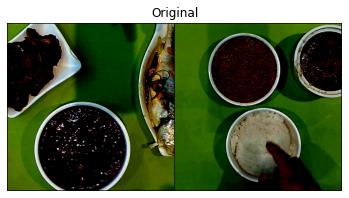

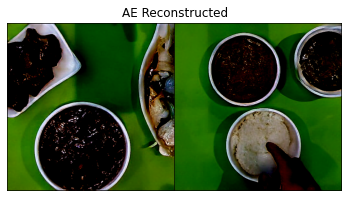

  0%|          | 0/11163 [00:00<?, ?it/s]

autoencoder  loss: 235218.906250
gan  loss: 0.417725
autoencoder  loss: 289730.875000
autoencoder  loss: 316205.625000
autoencoder  loss: 291474.687500
gan  loss: 0.274024
autoencoder  loss: 226991.859375
autoencoder  loss: 289413.156250
autoencoder  loss: 285135.375000
gan  loss: 0.882069
autoencoder  loss: 259430.953125
autoencoder  loss: 253569.312500
autoencoder  loss: 276735.343750
gan  loss: 0.384849
autoencoder  loss: 303494.625000
autoencoder  loss: 268262.500000
autoencoder  loss: 261322.500000
gan  loss: 0.121387
autoencoder  loss: 320670.562500
autoencoder  loss: 366710.000000
autoencoder  loss: 281145.812500
gan  loss: 0.153428
autoencoder  loss: 311565.093750
autoencoder  loss: 289668.812500
autoencoder  loss: 238044.734375
gan  loss: 0.707610
autoencoder  loss: 280709.093750
autoencoder  loss: 274001.500000
autoencoder  loss: 244995.984375
gan  loss: 0.272363
autoencoder  loss: 281926.718750
autoencoder  loss: 291070.562500
autoencoder  loss: 271146.312500
gan  loss: 1.31

  0%|          | 0/2791 [00:00<?, ?it/s]

validate AutoEncoder Average Loss: 296977.768299, disc Loss: 0.598805


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


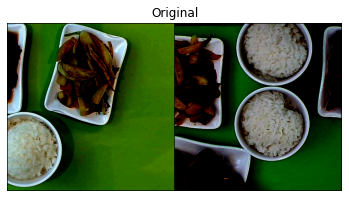

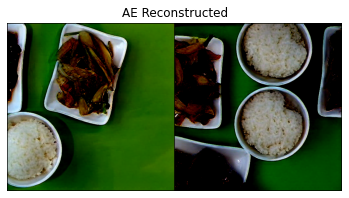

  0%|          | 0/11163 [00:00<?, ?it/s]

gan  loss: 0.699778
autoencoder  loss: 266029.906250
autoencoder  loss: 277546.281250
autoencoder  loss: 284120.812500
gan  loss: 0.304854
autoencoder  loss: 291203.125000
autoencoder  loss: 226978.687500
autoencoder  loss: 288426.750000
gan  loss: 0.335902
autoencoder  loss: 273292.406250
autoencoder  loss: 286428.687500
autoencoder  loss: 270125.312500
gan  loss: 0.140006
autoencoder  loss: 280629.187500
autoencoder  loss: 265028.875000
autoencoder  loss: 289690.468750
gan  loss: 0.688889
autoencoder  loss: 314474.781250
autoencoder  loss: 239253.062500
autoencoder  loss: 294375.187500
gan  loss: 0.551787
autoencoder  loss: 268087.812500
autoencoder  loss: 261758.718750
autoencoder  loss: 296796.531250
gan  loss: 1.049648
autoencoder  loss: 269739.250000
autoencoder  loss: 257951.000000
autoencoder  loss: 266714.000000
gan  loss: 0.439941
autoencoder  loss: 309368.625000
autoencoder  loss: 245413.343750
autoencoder  loss: 240738.062500
gan  loss: 0.488901
autoencoder  loss: 261865.01

  0%|          | 0/2791 [00:00<?, ?it/s]

validate AutoEncoder Average Loss: 282527.983437, disc Loss: 0.329532


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


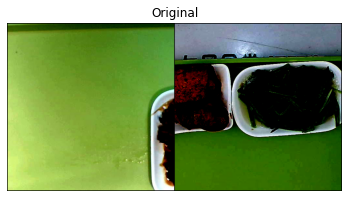

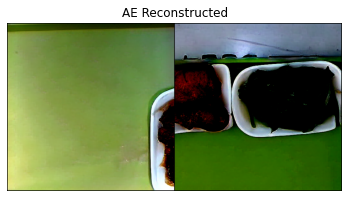

  0%|          | 0/11163 [00:00<?, ?it/s]

gan  loss: 0.244186
autoencoder  loss: 270322.218750
autoencoder  loss: 240905.328125
autoencoder  loss: 267784.187500
gan  loss: 0.416814
autoencoder  loss: 298943.718750
autoencoder  loss: 238385.843750
autoencoder  loss: 304575.625000
gan  loss: 0.298486
autoencoder  loss: 343589.031250
autoencoder  loss: 283983.093750
autoencoder  loss: 314023.562500
gan  loss: 0.147568
autoencoder  loss: 265174.750000
autoencoder  loss: 252640.375000
autoencoder  loss: 260026.625000
gan  loss: 0.261033
autoencoder  loss: 284500.718750
autoencoder  loss: 288710.468750
autoencoder  loss: 358195.187500
gan  loss: 0.294380
autoencoder  loss: 307484.968750
autoencoder  loss: 293181.937500
autoencoder  loss: 277639.062500
gan  loss: 0.344262
autoencoder  loss: 251791.718750
autoencoder  loss: 321405.906250
autoencoder  loss: 276231.375000
gan  loss: 0.095108
autoencoder  loss: 235190.062500
autoencoder  loss: 265220.625000
autoencoder  loss: 277481.218750
gan  loss: 0.331044
autoencoder  loss: 296376.68

  0%|          | 0/2791 [00:00<?, ?it/s]

validate AutoEncoder Average Loss: 285416.385689, disc Loss: 0.522142


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


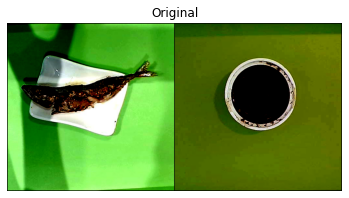

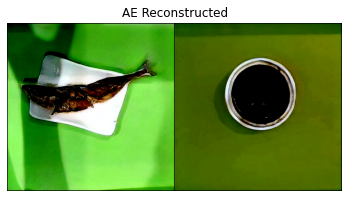

  0%|          | 0/11163 [00:00<?, ?it/s]

autoencoder  loss: 284491.093750
autoencoder  loss: 261227.234375
autoencoder  loss: 289071.562500
gan  loss: 0.225362
autoencoder  loss: 280504.687500
autoencoder  loss: 255339.828125
autoencoder  loss: 275568.250000
gan  loss: 0.083971
autoencoder  loss: 254514.765625
autoencoder  loss: 248594.625000
autoencoder  loss: 291245.937500
gan  loss: 0.445533
autoencoder  loss: 308861.937500
autoencoder  loss: 263171.906250
autoencoder  loss: 300833.937500
gan  loss: 0.678469
autoencoder  loss: 287273.781250
autoencoder  loss: 267287.250000
autoencoder  loss: 316989.062500
gan  loss: 1.313061
autoencoder  loss: 192188.390625
autoencoder  loss: 273079.968750
autoencoder  loss: 238815.281250
gan  loss: 0.451085
autoencoder  loss: 333934.531250
autoencoder  loss: 283334.531250
autoencoder  loss: 310916.843750
gan  loss: 0.379911
autoencoder  loss: 312713.343750
autoencoder  loss: 336721.437500
autoencoder  loss: 269671.718750
gan  loss: 0.687749
autoencoder  loss: 311021.906250
autoencoder  lo

  0%|          | 0/2791 [00:00<?, ?it/s]

validate AutoEncoder Average Loss: 288990.776244, disc Loss: 0.432573


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


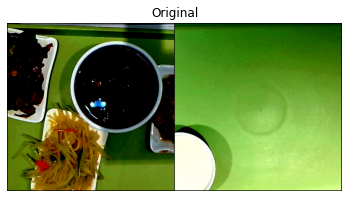

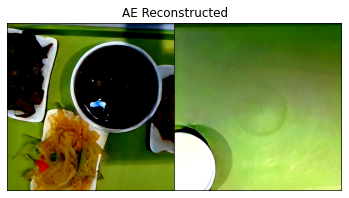

  0%|          | 0/11163 [00:00<?, ?it/s]

autoencoder  loss: 255623.562500
autoencoder  loss: 291945.843750
gan  loss: 0.359558
autoencoder  loss: 342253.437500
autoencoder  loss: 286217.343750
autoencoder  loss: 270843.156250
gan  loss: 0.080995
autoencoder  loss: 340770.343750
autoencoder  loss: 328029.375000
autoencoder  loss: 289473.375000
gan  loss: 0.299658
autoencoder  loss: 289834.375000
autoencoder  loss: 218735.062500
autoencoder  loss: 295794.125000
gan  loss: 0.277725
autoencoder  loss: 281068.312500
autoencoder  loss: 199197.984375
autoencoder  loss: 242327.984375
gan  loss: 0.146923
autoencoder  loss: 293018.468750
autoencoder  loss: 240486.968750
autoencoder  loss: 294172.375000
gan  loss: 0.167649
autoencoder  loss: 298149.468750
autoencoder  loss: 267850.687500
autoencoder  loss: 274270.281250
gan  loss: 0.314506
autoencoder  loss: 310129.781250
autoencoder  loss: 253395.781250
autoencoder  loss: 259634.093750
gan  loss: 0.497343
autoencoder  loss: 268634.375000
autoencoder  loss: 287455.843750
autoencoder  lo

  0%|          | 0/2791 [00:00<?, ?it/s]

validate AutoEncoder Average Loss: 281029.400684, disc Loss: 0.325930


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


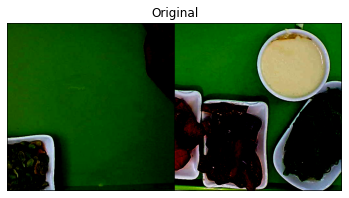

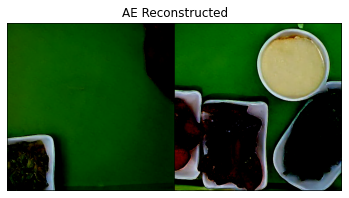

  0%|          | 0/11163 [00:00<?, ?it/s]

autoencoder  loss: 285695.093750
autoencoder  loss: 322016.031250
gan  loss: 0.289066
autoencoder  loss: 290327.812500
autoencoder  loss: 265714.781250
autoencoder  loss: 292796.531250


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



autoencoder  loss: 294299.968750
autoencoder  loss: 212270.062500
gan  loss: 0.051387
autoencoder  loss: 292777.625000
autoencoder  loss: 256631.203125
autoencoder  loss: 260138.875000


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



autoencoder  loss: 268896.843750
autoencoder  loss: 272046.281250
gan  loss: 0.434650
autoencoder  loss: 263103.218750


  0%|          | 0/2791 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



gan  loss: 0.168333
autoencoder  loss: 288711.437500
autoencoder  loss: 291782.156250
autoencoder  loss: 280155.156250
gan  loss: 0.509127
autoencoder  loss: 255282.640625


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



autoencoder  loss: 246766.484375
autoencoder  loss: 257640.687500
gan  loss: 0.273688
autoencoder  loss: 288147.968750
autoencoder  loss: 287633.250000
autoencoder  loss: 238230.859375


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



gan  loss: 0.875158
autoencoder  loss: 321475.937500
autoencoder  loss: 242542.203125
autoencoder  loss: 327903.625000
gan  loss: 0.260104
autoencoder  loss: 199217.859375


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



autoencoder  loss: 239845.187500
gan  loss: 0.108806
autoencoder  loss: 242402.968750
autoencoder  loss: 263290.218750
autoencoder  loss: 230899.984375
gan  loss: 0.314902


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



validate AutoEncoder Average Loss: 277405.880006, disc Loss: 0.495432


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


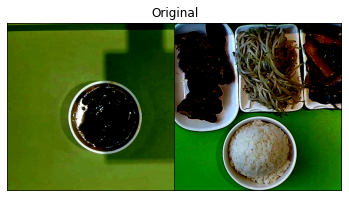

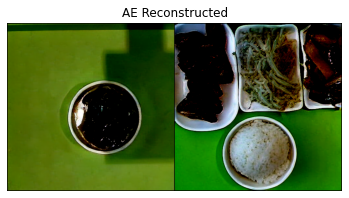

  0%|          | 0/11163 [00:00<?, ?it/s]

autoencoder  loss: 262543.843750
gan  loss: 1.112554
autoencoder  loss: 296054.000000
autoencoder  loss: 307826.218750
autoencoder  loss: 242359.875000
gan  loss: 0.291429
autoencoder  loss: 274188.750000
autoencoder  loss: 194173.718750
autoencoder  loss: 269548.781250
gan  loss: 0.239871
autoencoder  loss: 252067.328125
autoencoder  loss: 270663.125000
autoencoder  loss: 274767.218750
gan  loss: 0.339633
autoencoder  loss: 338593.125000
autoencoder  loss: 269000.031250
autoencoder  loss: 270027.187500
gan  loss: 0.701412


In [ ]:
trainer.train(train_dataset,100,model_name,batch_size=2,print_step=500,val_dataset=val_dataset)

In [14]:
from torch.utils.data import DataLoader
from torchvision.utils import make_grid

val_loader = DataLoader(
                val_dataset,
                batch_size=4,
                shuffle=True,
                num_workers=1,
#                 multiprocessing_context=mp.get_context('spawn') if num_workers>0 else None,
                collate_fn=val_dataset.collate_fn if hasattr(val_dataset,'collate_fn') else None
            )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


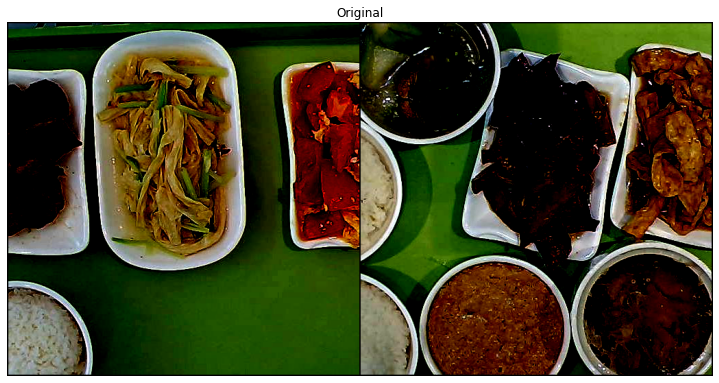

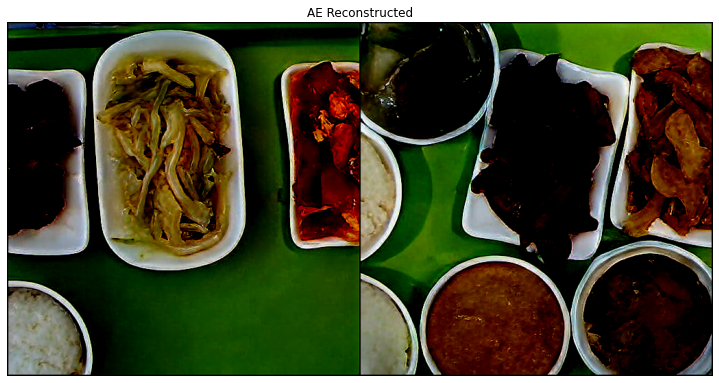

In [15]:
model.to('cuda')
model.eval()
x = next(iter(val_loader))
x = x[0:2]
x_hat, _ = model(x.to('cuda'))
plt.figure(figsize=(16,6.5))
plt.axis('off')
plt.imshow(make_grid(x[:64,:,:,:].cpu()).permute([1,2,0]), vmin=0., vmax=1.)
plt.title("Original")

plt.figure(figsize=(16,6.5))
plt.axis('off')
plt.imshow(make_grid(x_hat[:64,:,:,:].cpu()).permute([1,2,0]), vmin=0., vmax=1.)
plt.title("AE Reconstructed")
plt.show()

In [ ]:
import albumentations

In [19]:
albumentations.SmallestMaxSize?

Init signature:
albumentations.SmallestMaxSize(
    max_size:Union[int, Sequence[int]]=1024,
    interpolation:int=1,
    always_apply:bool=False,
    p:float=1,
)
Docstring:     
Rescale an image so that minimum side is equal to max_size, keeping the aspect ratio of the initial image.

Args:
    max_size (int, list of int): maximum size of smallest side of the image after the transformation. When using a
        list, max size will be randomly selected from the values in the list.
    interpolation (OpenCV flag): interpolation method. Default: cv2.INTER_LINEAR.
    p (float): probability of applying the transform. Default: 1.

Targets:
    image, mask, bboxes, keypoints

Image types:
    uint8, float32
File:           ~/tangdong/workspace/anaconda3/envs/cn_image_generation/lib/python3.6/site-packages/albumentations/augmentations/geometric/resize.py
Type:           SerializableMeta
Subclasses:     
